In [1]:
import sys
import os
from pathlib import Path
import importlib
import pandas as pd
import pandas_market_calendars as mcal
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

# Get the project root directory (parent of notebooks/)
project_root = Path.cwd().parent if Path.cwd().name == 'notebooks' else Path.cwd()


# Add src directory to Python path
sys.path.insert(0, str(project_root / 'src'))

# Import and reload to pick up any code changes
try:
    from classes.data import cleaner as cleaner_module
except ImportError:
    # First time import
    import classes.data.cleaner as cleaner_module
else:
    # Module already imported, reload it
    importlib.reload(cleaner_module)

from classes.data.cleaner import DataCleaner

-----

In [5]:
relative_file_path = 'data/raw/^VIX_1day_20231027_20251027.csv'
path = project_root / relative_file_path
df1 = DataCleaner(path)

In [6]:
#data cleaning 
print(df1.df.iloc[:5,:])
df1.clean()
print(df1.df.iloc[:5,:])

/Users/baudotedua/Dropbox/Mac/Desktop/intraday_momentum/intraday-momentum/src/classes/data/cleaner.py:76: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  self.df['Datetime'] = pd.to_datetime(self.df['caldt'], errors='raise')
INFO: Missing Ratios After Indexing:
INFO: volume    0.0
open      0.0
high      0.0
low       0.0
close     0.0


   volume       open       high        low      close  \
0       0  20.389999  22.070000  19.719999  21.270000   
1       0  21.129999  21.160000  19.549999  19.750000   
2       0  19.860001  19.860001  17.969999  18.139999   
3       0  18.020000  18.420000  16.629999  16.870001   
4       0  16.590000  16.620001  15.580000  15.660000   

                       caldt  
0  2023-10-27 00:00:00-05:00  
1  2023-10-30 00:00:00-05:00  
2  2023-10-31 00:00:00-05:00  
3  2023-11-01 00:00:00-05:00  
4  2023-11-02 00:00:00-05:00  
                           volume       open       high        low      close
Datetime                                                                     
2023-10-27 05:00:00+00:00       0  20.389999  22.070000  19.719999  21.270000
2023-10-30 05:00:00+00:00       0  21.129999  21.160000  19.549999  19.750000
2023-10-31 05:00:00+00:00       0  19.860001  19.860001  17.969999  18.139999
2023-11-01 05:00:00+00:00       0  18.020000  18.420000  16.629999  16.870001
202

/Users/baudotedua/Dropbox/Mac/Desktop/intraday_momentum/intraday-momentum/src/classes/data/cleaner.py:225: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax3.legend(loc='lower left')


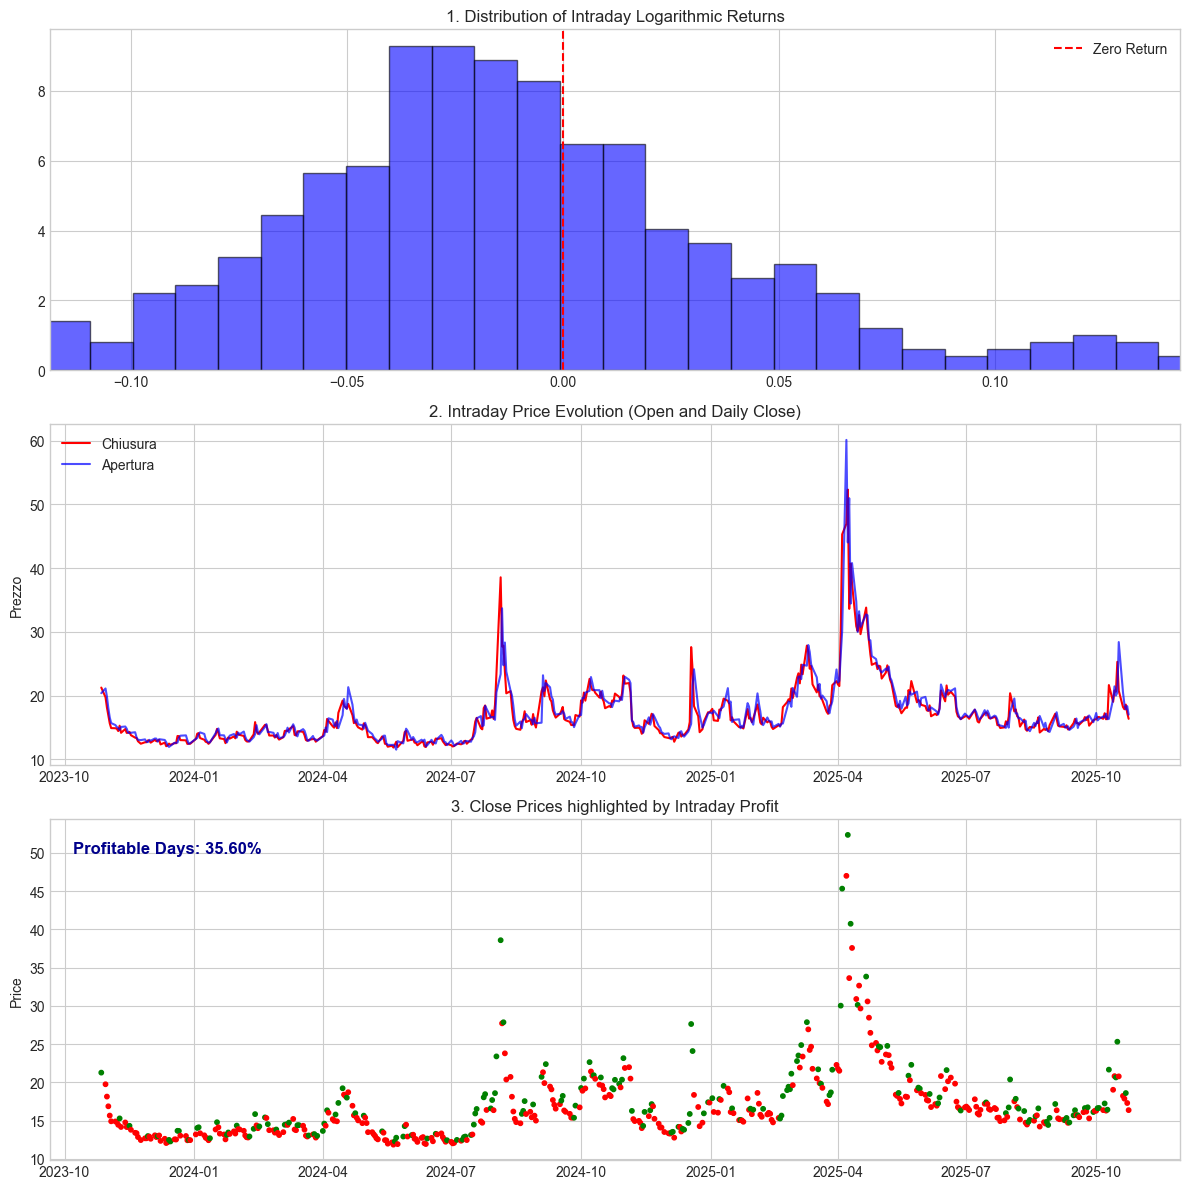

In [7]:
df1.plot()

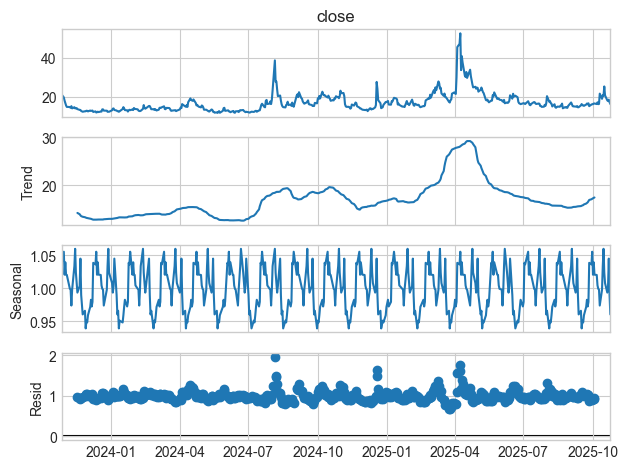

INFO: Price deseasonalized using period=30 and NaNs filled.


In [8]:
df1.deseasonalize(period='d', plot=True)

In [9]:
#deseasonalized prices column can be found in the dataframe 
print(df1.df.columns)

Index(['volume', 'open', 'high', 'low', 'close', 'close_deseasonalized'], dtype='object')


In [10]:
df1.save_cleaned('^VIX_1day_20231027_20251027')

INFO: Object successfully pickled and saved to: /Users/baudotedua/Dropbox/Mac/Desktop/intraday_momentum/intraday-momentum/data/cleaned/^VIX_1day_20231027_20251027.pkl


-----

In [11]:
relative_file_path = 'data/raw/^VIX_1day_20231103_20251103.csv'
path = project_root / relative_file_path
df2 = DataCleaner(path)


In [12]:
#data cleaning 
print(df2.df.iloc[:5,:])
df2.clean()
print(df2.df.iloc[:5,:])


/Users/baudotedua/Dropbox/Mac/Desktop/intraday_momentum/intraday-momentum/src/classes/data/cleaner.py:76: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  self.df['Datetime'] = pd.to_datetime(self.df['caldt'], errors='raise')
INFO: Missing Ratios After Indexing:
INFO: volume    0.0
open      0.0
high      0.0
low       0.0
close     0.0


   volume   open   high    low  close                      caldt
0       0  15.70  15.83  14.91  14.91  2023-11-03 00:00:00-04:00
1       0  15.39  15.58  14.84  14.89  2023-11-06 00:00:00-05:00
2       0  15.10  15.17  14.71  14.81  2023-11-07 00:00:00-05:00
3       0  14.91  15.09  14.30  14.45  2023-11-08 00:00:00-05:00
4       0  14.61  15.57  14.13  15.29  2023-11-09 00:00:00-05:00
                           volume   open   high    low  close
Datetime                                                     
2023-11-03 04:00:00+00:00       0  15.70  15.83  14.91  14.91
2023-11-06 05:00:00+00:00       0  15.39  15.58  14.84  14.89
2023-11-07 05:00:00+00:00       0  15.10  15.17  14.71  14.81
2023-11-08 05:00:00+00:00       0  14.91  15.09  14.30  14.45
2023-11-09 05:00:00+00:00       0  14.61  15.57  14.13  15.29


/Users/baudotedua/Dropbox/Mac/Desktop/intraday_momentum/intraday-momentum/src/classes/data/cleaner.py:225: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax3.legend(loc='lower left')


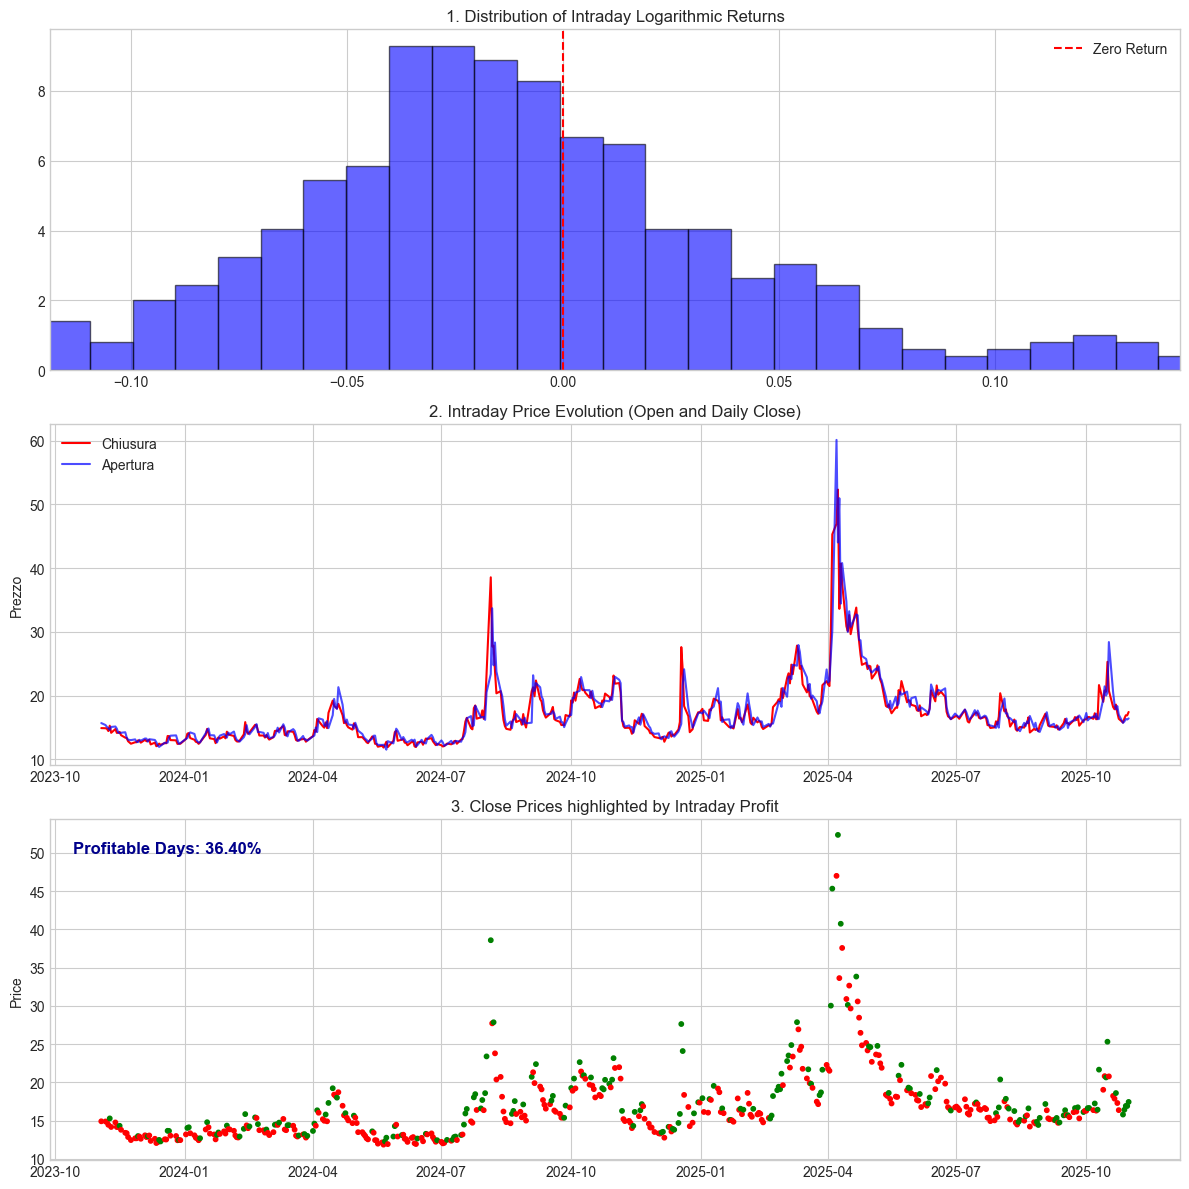

In [13]:
df2.plot()

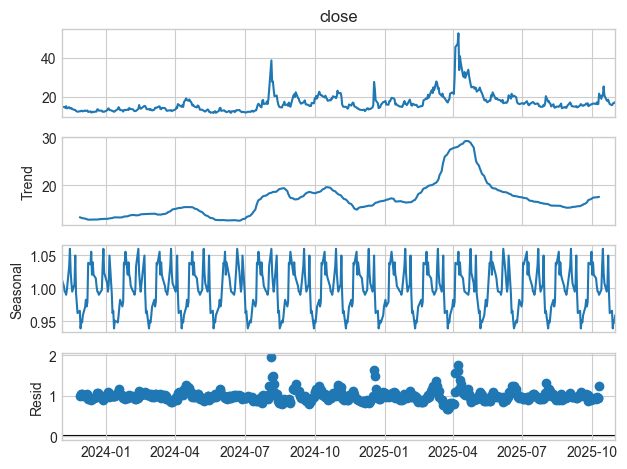

INFO: Price deseasonalized using period=30 and NaNs filled.


Index(['volume', 'open', 'high', 'low', 'close', 'close_deseasonalized'], dtype='object')


In [14]:
df2.deseasonalize(period='d', plot=True)
#deseasonalized prices column can be found in the dataframe 
print(df2.df.columns)

In [15]:
df2.save_cleaned('^VIX_1day_20231103_20251103')

INFO: Object successfully pickled and saved to: /Users/baudotedua/Dropbox/Mac/Desktop/intraday_momentum/intraday-momentum/data/cleaned/^VIX_1day_20231103_20251103.pkl


-----

In [16]:
relative_file_path = 'data/raw/SPY_1min_20231027_20251027.csv'
path = project_root / relative_file_path
df3 = DataCleaner(path)


In [17]:
#data cleaning 
print(df3.df.iloc[:5,:])
df3.clean()
print(df3.df.iloc[:5,:])

INFO: Missing Ratios After Indexing:
INFO: volume    0.0
open      0.0
high      0.0
low       0.0
close     0.0


     volume     open    high      low    close                caldt
0  630285.0  413.560  413.94  413.530  413.770  2023-10-30 09:30:00
1  322290.0  413.780  414.01  413.750  413.882  2023-10-30 09:31:00
2  455364.0  413.910  414.21  413.845  414.140  2023-10-30 09:32:00
3  269190.0  414.130  414.24  414.050  414.205  2023-10-30 09:33:00
4  330914.0  414.205  414.32  414.205  414.270  2023-10-30 09:34:00
                       volume     open    high      low    close
Datetime                                                        
2023-10-30 09:30:00  630285.0  413.560  413.94  413.530  413.770
2023-10-30 09:31:00  322290.0  413.780  414.01  413.750  413.882
2023-10-30 09:32:00  455364.0  413.910  414.21  413.845  414.140
2023-10-30 09:33:00  269190.0  414.130  414.24  414.050  414.205
2023-10-30 09:34:00  330914.0  414.205  414.32  414.205  414.270


/Users/baudotedua/Dropbox/Mac/Desktop/intraday_momentum/intraday-momentum/src/classes/data/cleaner.py:225: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax3.legend(loc='lower left')


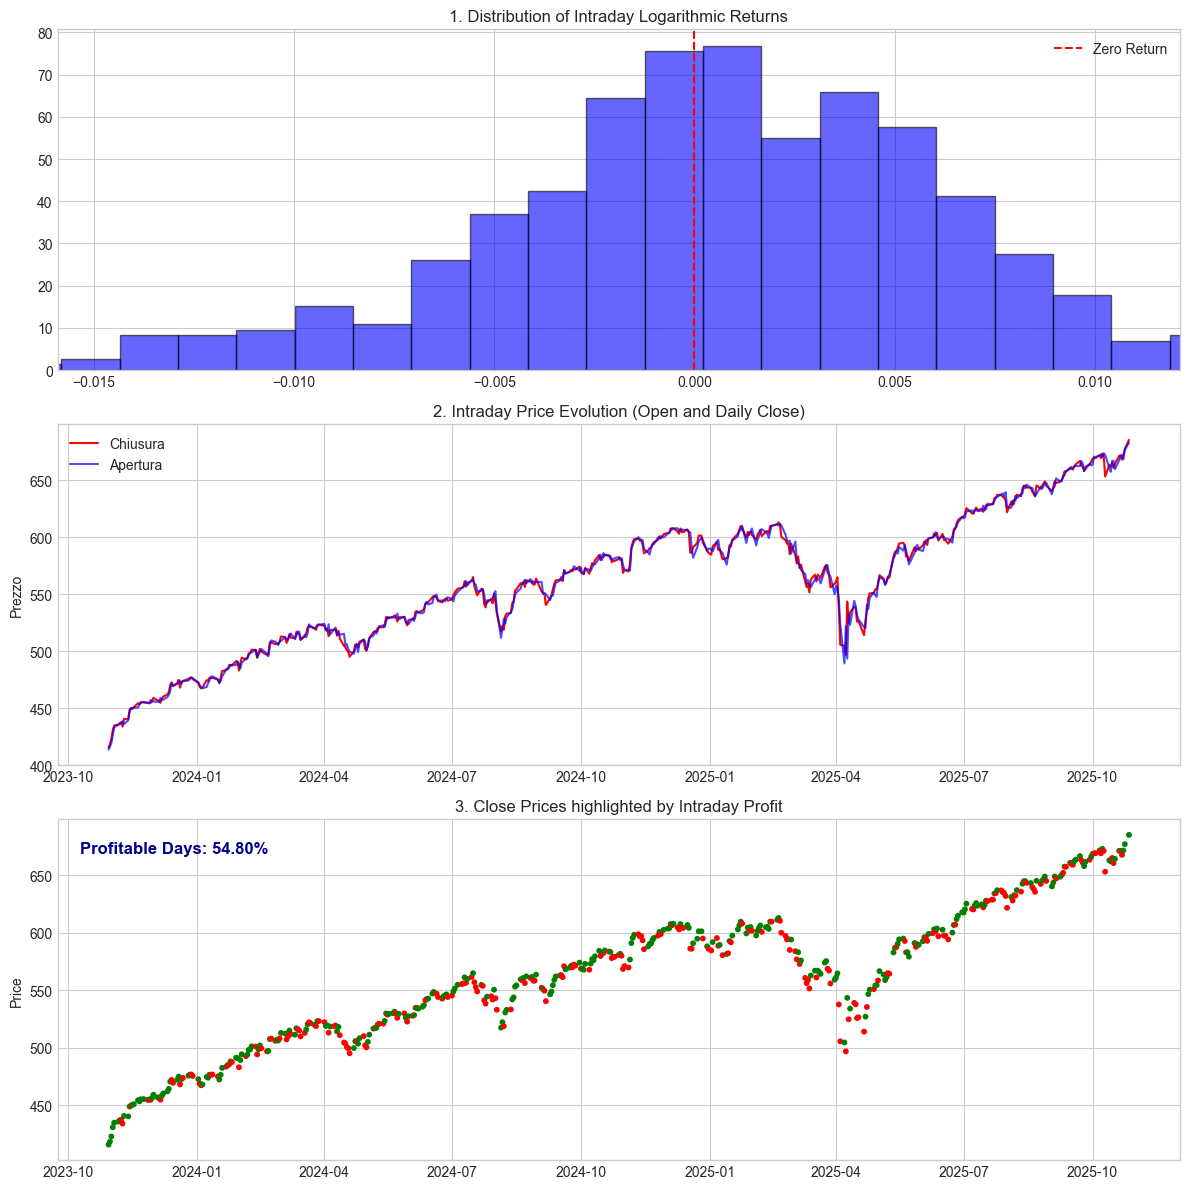

In [18]:
df3.plot()

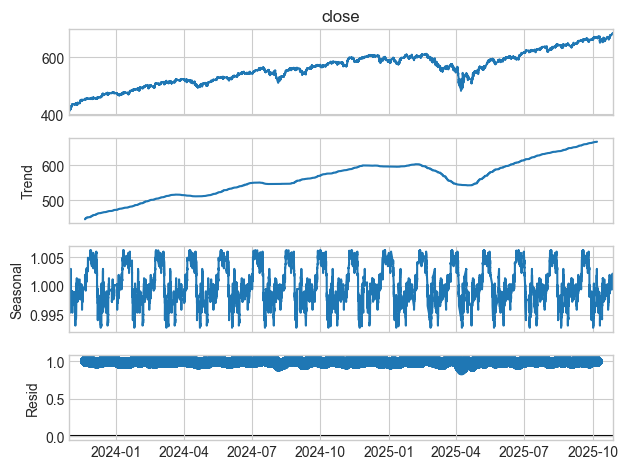

INFO: Price deseasonalized using period=11700 and NaNs filled.


Index(['volume', 'open', 'high', 'low', 'close', 'close_deseasonalized'], dtype='object')


In [20]:
df3.deseasonalize(period='m', plot=True)
#deseasonalized prices column can be found in the dataframe 
print(df3.df.columns)

In [21]:
df3.save_cleaned('SPY_1min_20231027_20251027')

INFO: Object successfully pickled and saved to: /Users/baudotedua/Dropbox/Mac/Desktop/intraday_momentum/intraday-momentum/data/cleaned/SPY_1min_20231027_20251027.pkl


-----

In [22]:
relative_file_path = 'data/raw/SPY_1min_20231103_20251103.csv.gz'
path = project_root / relative_file_path
df4 = DataCleaner(path)

In [23]:
#data cleaning 
print(df4.df.iloc[:5,:])
df4.clean()
print(df4.df.iloc[:5,:])

INFO: Missing Ratios After Indexing:
INFO: volume    0.0
open      0.0
high      0.0
low       0.0
close     0.0


     volume    open      high     low    close                caldt
0  960246.0  435.47  436.1400  435.46  436.125  2023-11-06 09:30:00
1  361691.0  436.13  436.1498  435.95  436.030  2023-11-06 09:31:00
2  193663.0  436.02  436.0700  435.73  435.740  2023-11-06 09:32:00
3  203217.0  435.75  435.7900  435.59  435.740  2023-11-06 09:33:00
4  172073.0  435.74  435.7900  435.65  435.750  2023-11-06 09:34:00
                       volume    open      high     low    close
Datetime                                                        
2023-11-06 09:30:00  960246.0  435.47  436.1400  435.46  436.125
2023-11-06 09:31:00  361691.0  436.13  436.1498  435.95  436.030
2023-11-06 09:32:00  193663.0  436.02  436.0700  435.73  435.740
2023-11-06 09:33:00  203217.0  435.75  435.7900  435.59  435.740
2023-11-06 09:34:00  172073.0  435.74  435.7900  435.65  435.750


/Users/baudotedua/Dropbox/Mac/Desktop/intraday_momentum/intraday-momentum/src/classes/data/cleaner.py:225: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax3.legend(loc='lower left')


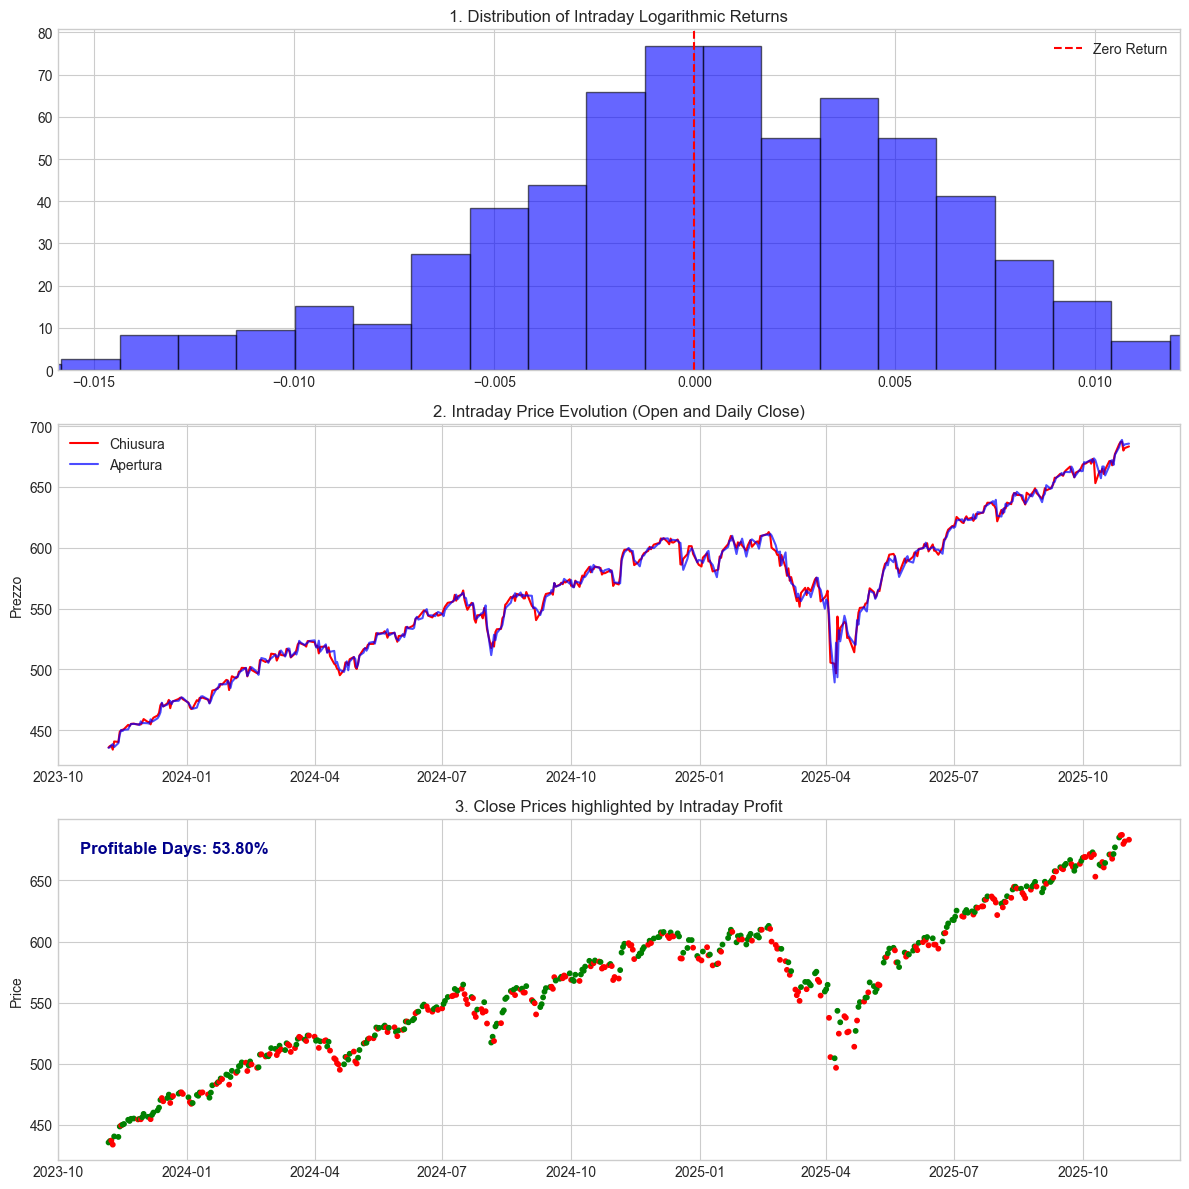

In [24]:
df4.plot()

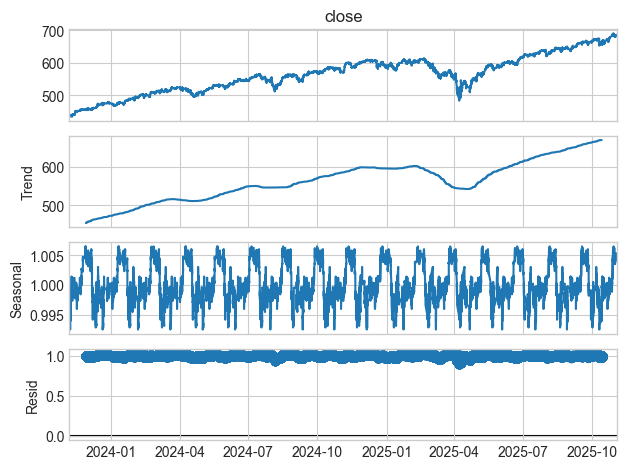

INFO: Price deseasonalized using period=11700 and NaNs filled.


Index(['volume', 'open', 'high', 'low', 'close', 'close_deseasonalized'], dtype='object')


In [26]:
df4.deseasonalize(period='m', plot=True)
#deseasonalized prices column can be found in the dataframe 
print(df4.df.columns)

In [27]:
df4.save_cleaned('SPY_1min_20231103_20251103')

INFO: Object successfully pickled and saved to: /Users/baudotedua/Dropbox/Mac/Desktop/intraday_momentum/intraday-momentum/data/cleaned/SPY_1min_20231103_20251103.pkl
